# Soln 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
sns.set()
import torch.nn as nn
import torch.nn.functional as F

### load and preprocessing data

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

In [3]:
transform = transforms.Compose([ transforms.ToTensor()  ])

In [4]:
train_data = datasets.MNIST(root='mnist' ,train =True, download =True, transform =transform)
test_data = datasets.MNIST(root='mnist' ,train =False, download =True, transform =transform)

In [5]:
train_loader = DataLoader(train_data , batch_size = 20, shuffle=True)
test_loader = DataLoader( test_data , batch_size =20 , shuffle=False)

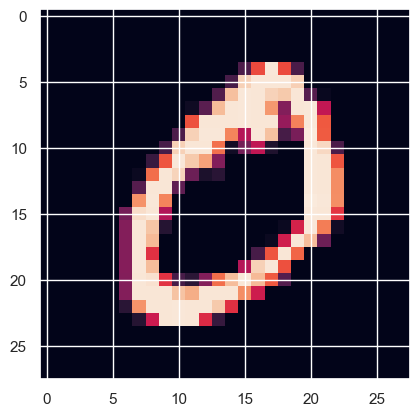

In [6]:
for i , (x_train,y_train) in enumerate(train_data):
    if(y_train==0):
        break
       
x= x_train.view(28,28 )
plt.imshow(x.numpy()) 

### Building CNN model

In [7]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,64,5,1)
        self.conv2=nn.Conv2d(64,128,3,1)
        self.fc1= nn.Linear(5*5*128, 64)
        self.fc2=nn.Linear(64, 32)
        self.fc3=nn.Linear(32,10)

    def forward(self, x):
        x=F.relu(self.conv1(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv2(x))
        x=F.max_pool2d(x,2,2)
        x= x.view(-1,128*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))

        return F.log_softmax(x, dim=1)
                 

In [8]:
model  = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001 )

In [9]:
epoches =10
train_losses=[]
test_losses=[]
train_correct= []
test_correct=[]
pred_test_y=[]
actual_test_y=[]

for i in range(epoches):
    test_corr = 0
    train_corr = 0

    for b , (x_train,y_train) in enumerate(train_loader):
        b +=1
        y_pred= model(x_train)
        loss= criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted==y_train).sum()
        train_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_losses.append(loss.detach().item())
    train_correct.append(train_corr.detach().item())

    with torch.no_grad():
        for b , (x_test,y_test) in enumerate (test_loader):
            y_val = model(x_test)
            predictions = torch.max(y_val.data , 1)[1]
            batch1_corr =(predictions==y_test).sum() 
            test_corr += batch1_corr
            if(i==1):
                pred_test_y.extend(predictions.cpu().numpy()) 
                actual_test_y.extend(y_test.cpu().numpy())     
                

    test_losses.append(criterion(y_val, y_test).detach().item())
    test_correct.append(test_corr.detach().item())

    print(f"train loss: {loss:.3f} , test loss : {criterion(y_val, y_test):.3f} , train accuracy : {train_corr/600:.3f}% , test acccuracy : {test_corr/100:.3f}%")

train loss: 0.807 , test loss : 0.723 , train accuracy : 68.472% , test acccuracy : 70.420%
train loss: 0.387 , test loss : 0.465 , train accuracy : 72.655% , test acccuracy : 80.330%
train loss: 0.464 , test loss : 0.487 , train accuracy : 80.412% , test acccuracy : 80.140%
train loss: 0.807 , test loss : 0.461 , train accuracy : 80.525% , test acccuracy : 80.390%
train loss: 0.230 , test loss : 0.466 , train accuracy : 80.675% , test acccuracy : 80.530%
train loss: 0.588 , test loss : 0.461 , train accuracy : 80.715% , test acccuracy : 80.490%
train loss: 0.115 , test loss : 0.462 , train accuracy : 80.747% , test acccuracy : 80.350%
train loss: 0.120 , test loss : 0.461 , train accuracy : 80.805% , test acccuracy : 80.010%
train loss: 0.627 , test loss : 0.461 , train accuracy : 80.832% , test acccuracy : 80.010%
train loss: 0.691 , test loss : 0.461 , train accuracy : 80.850% , test acccuracy : 80.400%


### Analyzing model

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(actual_test_y, pred_test_y)
print(f"Accuracy test after augmentation: {accuracy * 100:.2f}%")

Accuracy test after augmentation: 80.33%


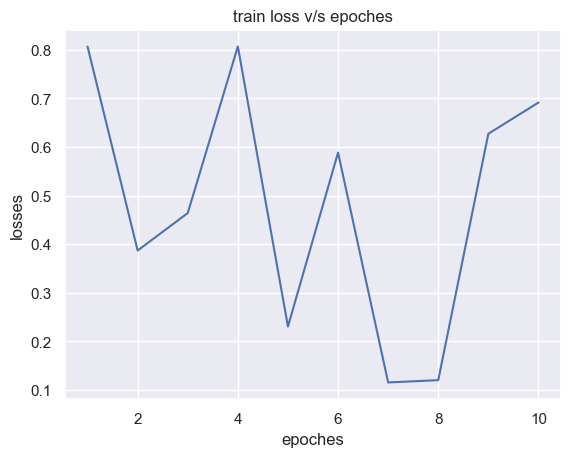

In [11]:

epo= [ i for i in range(1,11,1)]
plt.plot(epo , np.array(train_losses))
plt.xlabel("epoches")
plt.ylabel("losses")
plt.title("train loss v/s epoches")
plt.show()

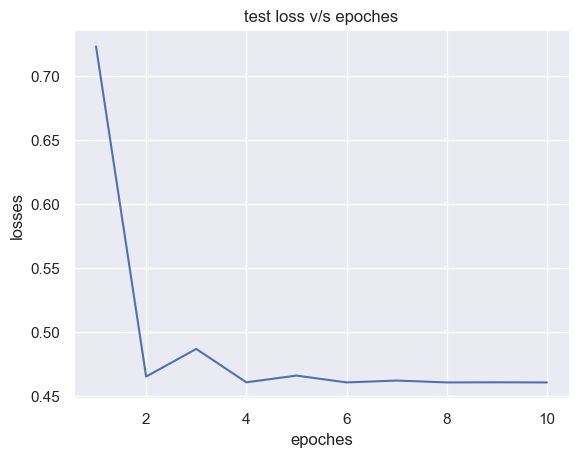

In [12]:
epo= [ i for i in range(1,11,1)]
plt.plot(epo , test_losses)
plt.xlabel("epoches")
plt.ylabel("losses")
plt.title("test loss v/s epoches")
plt.show()

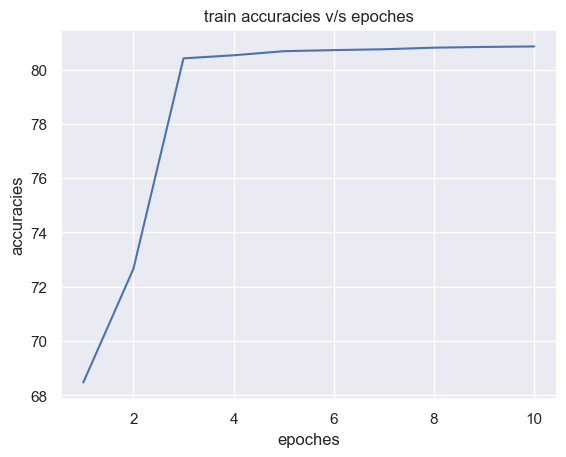

In [13]:

plt.plot(epo , [i/600 for i in (train_correct)])
plt.xlabel("epoches")
plt.ylabel("accuracies")
plt.title("train accuracies v/s epoches")
plt.show()

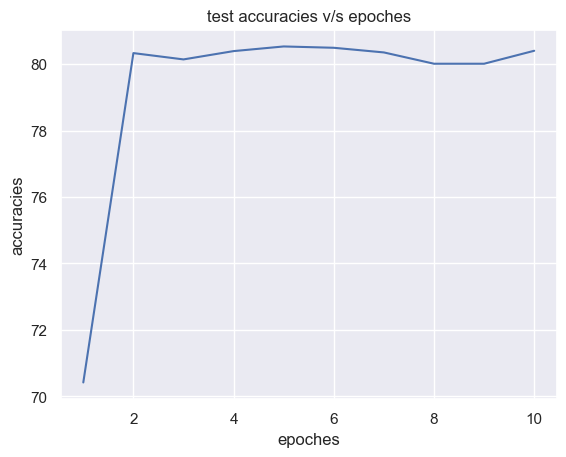

In [14]:

plt.plot(epo , [i/100 for i in (test_correct)])
plt.xlabel("epoches")
plt.ylabel("accuracies")
plt.title("test accuracies v/s epoches")
plt.show()

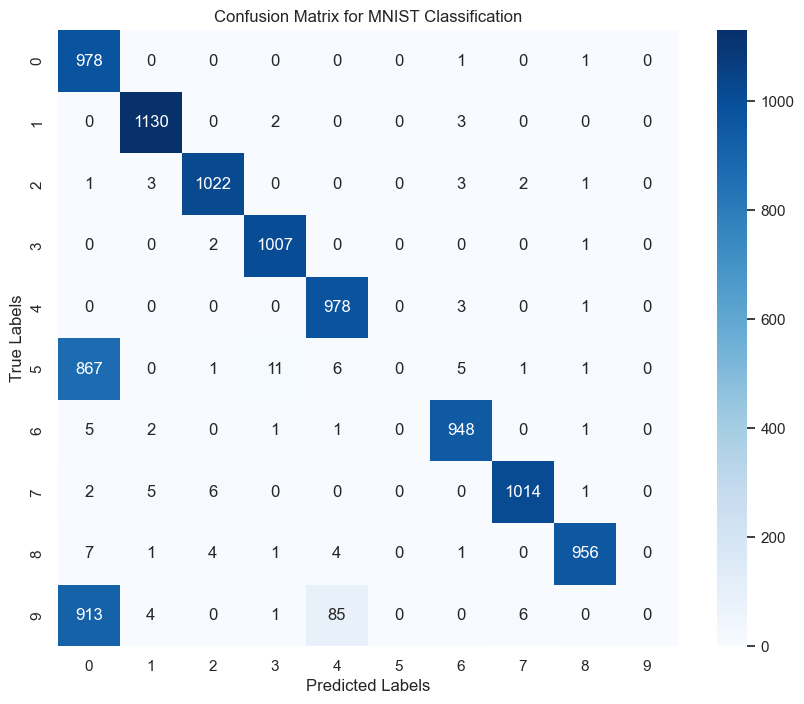

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_test_y, pred_test_y)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for MNIST Classification")
plt.show()

# Soln 2

### Loading and preprocessing

In [19]:
transform1 = transforms.Compose([
    transforms.RandomRotation(20), 
    transforms.RandomAffine(0, translate=(0.1, 0.1)),  
    transforms.ToTensor()  
])


In [20]:
train1_data =  datasets.MNIST(root='mnist' ,train =True, download =True, transform =transform1)
train1_loader = DataLoader(train1_data , batch_size = 10, shuffle=True)

### Traning data

In [21]:
epoches =10
train_losses=[]
test_losses=[]
train_correct= []
test_correct=[]
pred_test_y=[]
actual_test_y=[]

for i in range(epoches):
    test_corr = 0
    train_corr = 0

    for b , (x_train,y_train) in enumerate(train1_loader):
        b +=1
        y_pred= model(x_train)
        loss= criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted==y_train).sum()
        train_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_losses.append(loss.detach().item())
    train_correct.append(train_corr.detach().item())

    with torch.no_grad():
        for b , (x_test,y_test) in enumerate (test_loader):
            y_val = model(x_test)
            predictions = torch.max(y_val.data , 1)[1]
            batch1_corr =(predictions==y_test).sum() 
            test_corr += batch1_corr
            if(i==9):
                pred_test_y.extend(predictions.cpu().numpy()) 
                actual_test_y.extend(y_test.cpu().numpy()) 
                

    test_losses.append(criterion(y_val, y_test).detach().item())
    test_correct.append(test_corr.detach().item())

    print(f"train loss: {loss:.3f} , test loss : {criterion(y_val, y_test):.3f} , train accuracy : {train_corr/600:.3f}% , test acccuracy : {test_corr/100:.3f}%")

train loss: 0.624 , test loss : 0.461 , train accuracy : 78.443% , test acccuracy : 81.200%
train loss: 0.465 , test loss : 0.116 , train accuracy : 88.223% , test acccuracy : 89.330%
train loss: 0.005 , test loss : 0.116 , train accuracy : 88.498% , test acccuracy : 89.130%
train loss: 0.233 , test loss : 0.115 , train accuracy : 88.705% , test acccuracy : 89.250%
train loss: 0.446 , test loss : 0.115 , train accuracy : 88.760% , test acccuracy : 89.290%
train loss: 0.007 , test loss : 0.116 , train accuracy : 88.813% , test acccuracy : 88.940%
train loss: 0.461 , test loss : 0.115 , train accuracy : 88.865% , test acccuracy : 89.380%
train loss: 0.470 , test loss : 0.115 , train accuracy : 88.917% , test acccuracy : 89.390%
train loss: 0.471 , test loss : 0.115 , train accuracy : 88.898% , test acccuracy : 89.390%
train loss: 0.231 , test loss : 0.116 , train accuracy : 89.053% , test acccuracy : 89.190%


### Analyzing and Comparing model

In [22]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(actual_test_y, pred_test_y)
print(f"Accuracy test after augmentation: {accuracy1 * 100:.2f}%")

Accuracy test after augmentation: 89.19%


In [25]:
print (f"Test accuracy after Augmentation changes by {(accuracy1-accuracy)*100:.2f}% ")

Test accuracy after Augmentation changes by 8.86% 
